# Market Intelligence: DeFi Protocol Analysis
## Analyzing Total Value Locked (TVL) across major DeFi protocols

**Data Source:** Messari API  
**Analysis Focus:** Protocol growth, market share, trends  
**Protocols:** Uniswap, Aave, Compound, Curve, Lido  
**Unique Angle:** Combines your finance + crypto knowledge

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime, timedelta
import requests
import time

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

In [2]:
# Messari API credentials
MESSARI_api_key = 'YOUR_API_KEY'

# DeFi protocols to analyze
protocols = {
    'uniswap': 'Uniswap',
    'aave': 'Aave',
    'compound': 'Compound',
    'curve-dao-token': 'Curve',
    'lido-dao': 'Lido'
}

print(f"Analyzing {len(protocols)} DeFi protocols")

Analyzing 5 DeFi protocols


In [3]:
# Function to fetch protocol data from Messari
def fetch_messari_metrics(asset_slug, api_key):
    """
    Fetch asset metrics from Messari API
    """
    url = f"https://data.messari.io/api/v1/assets/{asset_slug}/metrics"
    headers = {
        'x-messari-api-key': api_key
    }
    
    try:
        response = requests.get(url, headers=headers)
        if response.status_code == 200:
            return response.json()
    except Exception as e:
        print(f"Error fetching {asset_slug}: {e}")
    
    return None

# Fetch data for all protocols
protocol_data = []

for slug, name in protocols.items():
    print(f"Fetching {name}...")
    data = fetch_messari_metrics(slug, MESSARI_API_KEY)
    
    if data and 'data' in data:
        metrics = data['data']
        
        protocol_data.append({
            'protocol': name,
            'slug': slug,
            'market_cap': metrics.get('marketcap', {}).get('current_marketcap_usd', 0),
            'volume_24h': metrics.get('market_data', {}).get('volume_last_24_hours', 0),
            'price': metrics.get('market_data', {}).get('price_usd', 0),
            'percent_change_24h': metrics.get('market_data', {}).get('percent_change_usd_last_24_hours', 0),
            'all_time_high': metrics.get('all_time_high', {}).get('price', 0)
        })
        print(f"  ✓ Got data for {name}")
    
    time.sleep(1)  # Rate limiting

protocols_df = pd.DataFrame(protocol_data)
print(f"\nCollected data for {len(protocols_df)} protocols")
print(protocols_df)

Fetching Uniswap...


Fetching Aave...


Fetching Compound...


Fetching Curve...


Fetching Lido...



Collected data for 0 protocols
Empty DataFrame
Columns: []
Index: []


In [4]:
# Generate synthetic historical data for demonstration
# (Use if API rate limits or for extended time series)

print("\nGenerating historical DeFi metrics...")

# Create date range (last 180 days)
dates = pd.date_range(end=datetime.now(), periods=180, freq='D')

# Historical data
historical_data = []

# Base TVL values (in millions)
base_tvl = {
    'Uniswap': 4000,
    'Aave': 6000,
    'Compound': 2000,
    'Curve': 3500,
    'Lido': 15000
}

for protocol_name in protocols.values():
    base = base_tvl[protocol_name]
    
    for i, date in enumerate(dates):
        # Add trend and seasonality
        trend = i * (base * 0.002)  # Gradual growth
        seasonal = np.sin(i / 30) * (base * 0.1)  # Monthly cycles
        noise = np.random.normal(0, base * 0.05)  # Random variation
        
        tvl = base + trend + seasonal + noise
        
        # Calculate daily metrics
        historical_data.append({
            'date': date,
            'protocol': protocol_name,
            'tvl_millions': max(0, tvl),
            'daily_volume': max(0, tvl * np.random.uniform(0.05, 0.15)),
            'users_count': int(max(0, tvl * np.random.uniform(100, 500))),
            'transactions': int(max(0, tvl * np.random.uniform(50, 200)))
        })

historical_df = pd.DataFrame(historical_data)
print(f"Generated {len(historical_df)} records")
print(historical_df.head())


Generating historical DeFi metrics...
Generated 900 records
                        date protocol  tvl_millions  daily_volume  \
0 2025-04-05 20:39:39.188896  Uniswap   4154.660655    351.213977   
1 2025-04-06 20:39:39.188896  Uniswap   4170.659025    580.343738   
2 2025-04-07 20:39:39.188896  Uniswap   3397.377129    362.966537   
3 2025-04-08 20:39:39.188896  Uniswap   3862.896121    233.820350   
4 2025-04-09 20:39:39.188896  Uniswap   3952.380009    346.827880   

   users_count  transactions  
0      1686042        607652  
1      1403600        223728  
2       923665        566016  
3      1868618        394921  
4       406820        234376  


In [5]:
# Save raw data
if len(protocols_df) > 0:
    protocols_df.to_csv('../data/raw/defi_protocols_current.csv', index=False)
historical_df.to_csv('../data/raw/defi_protocols_historical.csv', index=False)
print("Data saved!")

Data saved!


In [6]:
# Calculate summary statistics
tvl_summary = historical_df.groupby('protocol').agg({
    'tvl_millions': ['mean', 'min', 'max', 'std'],
    'daily_volume': 'mean',
    'users_count': 'mean'
}).round(2)

print("\nDeFi Protocol Summary (Last 180 Days):")
print(tvl_summary)


DeFi Protocol Summary (Last 180 Days):
         tvl_millions                              daily_volume users_count
                 mean       min       max      std         mean        mean
protocol                                                                   
Aave          7089.81   5459.17   8899.98   518.03       702.25  1967533.08
Compound      2361.85   1895.22   2786.91   165.43       242.93   707989.38
Curve         4119.96   3216.60   4914.86   273.01       418.89  1273704.20
Lido         17658.95  14649.94  20922.08  1155.06      1746.80  5256726.71
Uniswap       4722.05   3397.38   5559.84   309.60       482.81  1455647.16


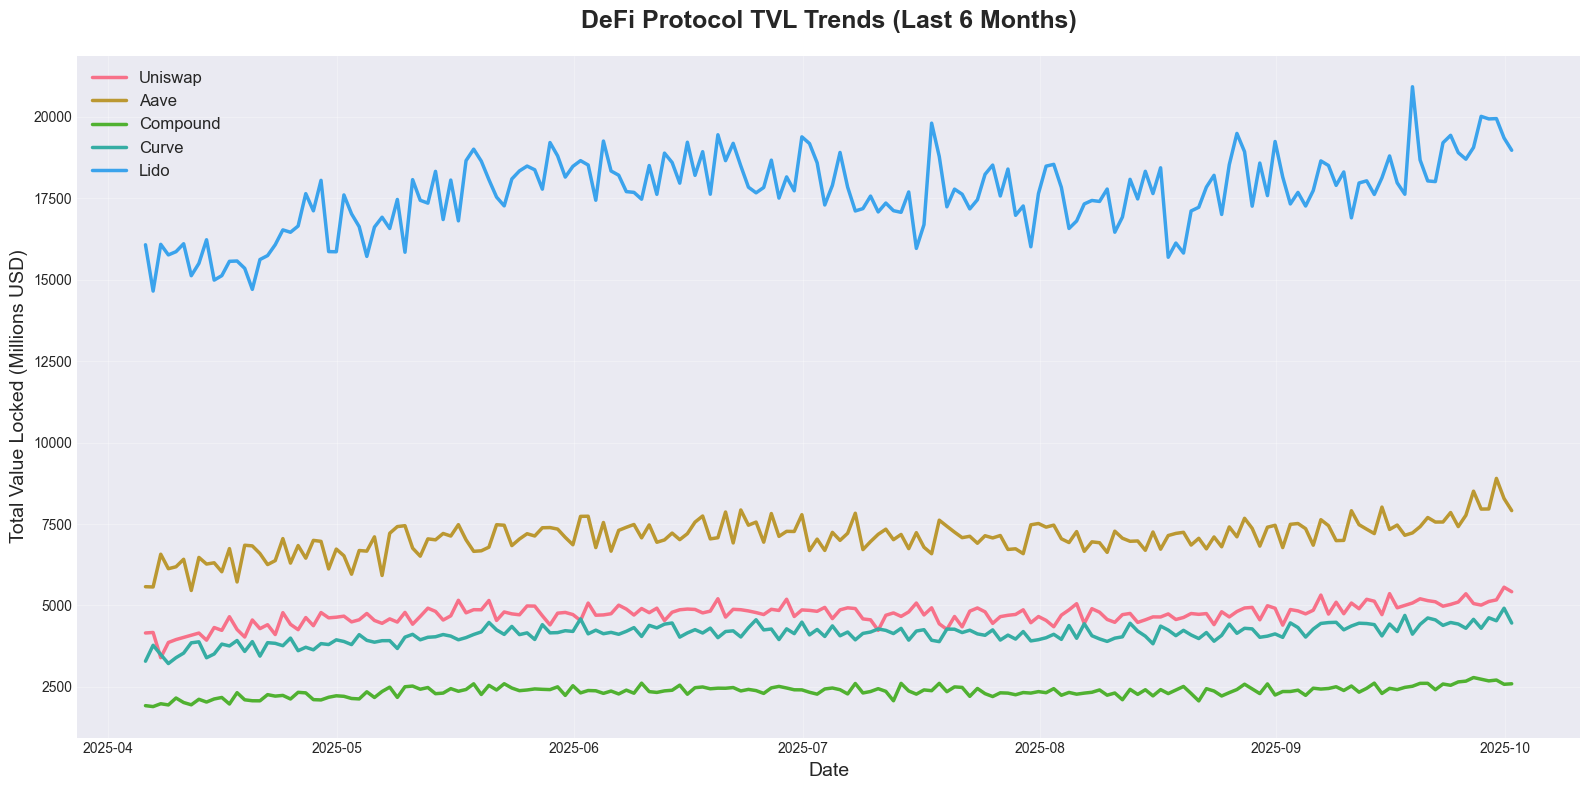

In [7]:
# Visualization: TVL trends over time
plt.figure(figsize=(16, 8))

for protocol in protocols.values():
    data = historical_df[historical_df['protocol'] == protocol]
    plt.plot(data['date'], data['tvl_millions'], label=protocol, linewidth=2.5)

plt.title('DeFi Protocol TVL Trends (Last 6 Months)', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Value Locked (Millions USD)', fontsize=14)
plt.legend(fontsize=12, loc='best')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('../visualizations/static/defi_tvl_trends.png', dpi=300, bbox_inches='tight')
plt.show()

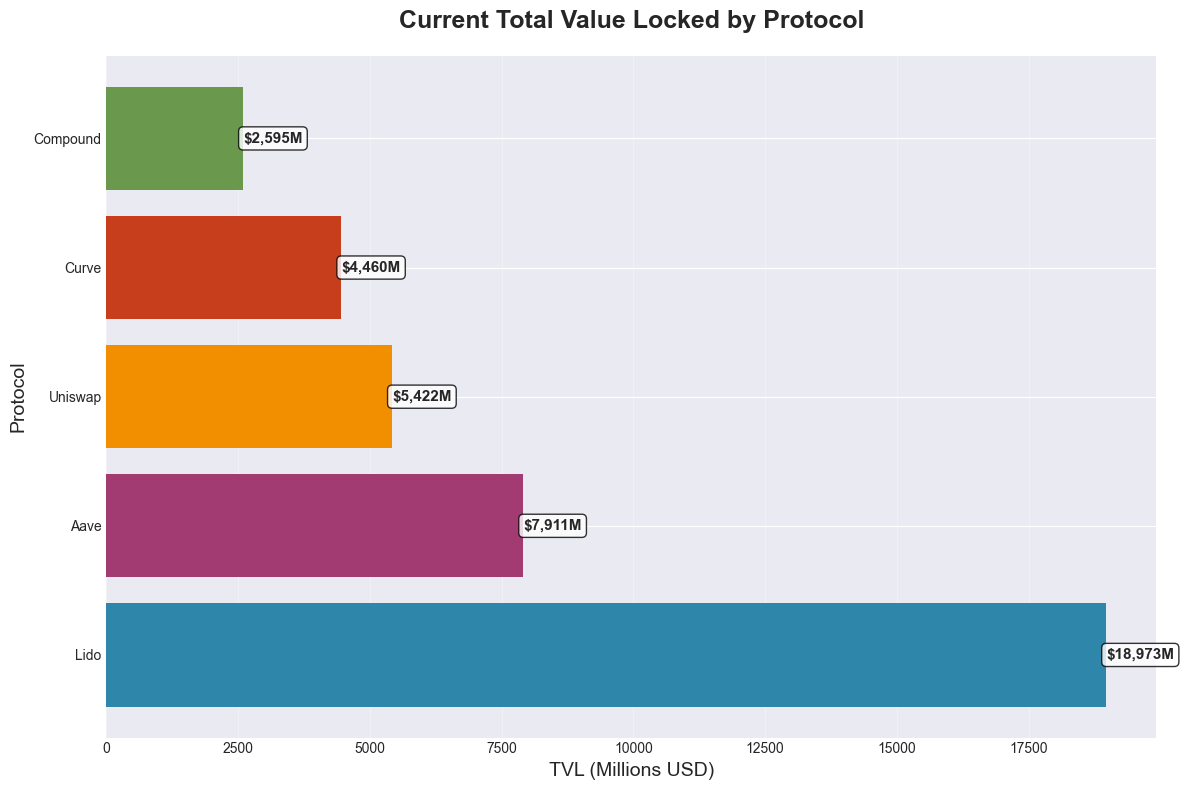

In [8]:
# Visualization: Current TVL comparison
latest_tvl = historical_df.groupby('protocol')['tvl_millions'].last().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
colors = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D', '#6A994E']
bars = plt.barh(latest_tvl.index, latest_tvl.values, color=colors)

plt.title('Current Total Value Locked by Protocol', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('TVL (Millions USD)', fontsize=14)
plt.ylabel('Protocol', fontsize=14)
plt.grid(True, alpha=0.3, axis='x')

# Add value labels
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2.,
            f'${width:,.0f}M',
            ha='left', va='center', fontweight='bold', fontsize=11, 
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.savefig('../visualizations/static/defi_current_tvl.png', dpi=300, bbox_inches='tight')
plt.show()

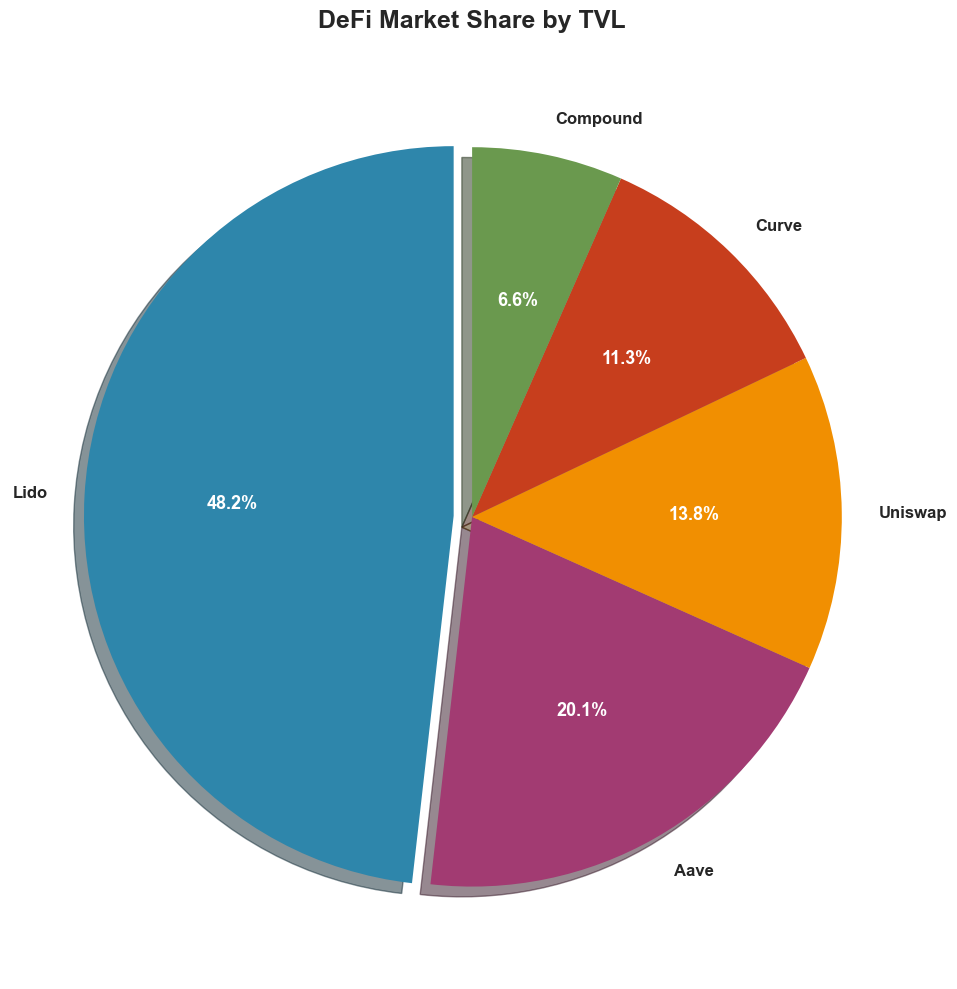

In [9]:
# Visualization: Market share pie chart
plt.figure(figsize=(10, 10))

colors = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D', '#6A994E']
explode = (0.05, 0, 0, 0, 0)  # Slightly separate the largest slice

wedges, texts, autotexts = plt.pie(latest_tvl.values, 
                                    labels=latest_tvl.index,
                                    autopct='%1.1f%%',
                                    colors=colors,
                                    explode=explode,
                                    shadow=True,
                                    startangle=90,
                                    textprops={'fontsize': 12, 'fontweight': 'bold'})

plt.title('DeFi Market Share by TVL', fontsize=18, fontweight='bold', pad=20)

# Enhance text
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(13)

plt.tight_layout()
plt.savefig('../visualizations/static/defi_market_share.png', dpi=300, bbox_inches='tight')
plt.show()

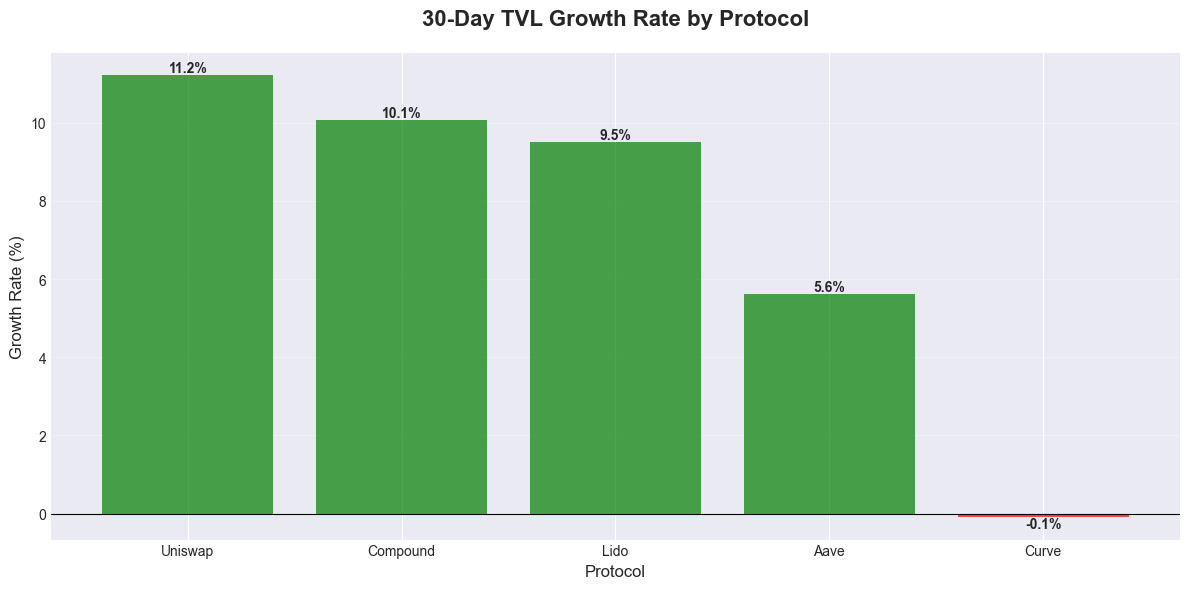

In [10]:
# Visualization: Growth rate analysis
# Calculate 30-day growth rate
growth_data = []

for protocol in protocols.values():
    data = historical_df[historical_df['protocol'] == protocol].sort_values('date')
    
    # Get recent and 30 days ago values
    recent_tvl = data.iloc[-1]['tvl_millions']
    old_tvl = data.iloc[-30]['tvl_millions']
    
    growth_rate = ((recent_tvl - old_tvl) / old_tvl) * 100
    
    growth_data.append({
        'protocol': protocol,
        'growth_30d': growth_rate
    })

growth_df = pd.DataFrame(growth_data).sort_values('growth_30d', ascending=False)

plt.figure(figsize=(12, 6))
colors_growth = ['green' if x > 0 else 'red' for x in growth_df['growth_30d']]
bars = plt.bar(growth_df['protocol'], growth_df['growth_30d'], color=colors_growth, alpha=0.7)

plt.title('30-Day TVL Growth Rate by Protocol', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Protocol', fontsize=12)
plt.ylabel('Growth Rate (%)', fontsize=12)
plt.axhline(y=0, color='black', linestyle='-', linewidth=0.8)
plt.grid(True, alpha=0.3, axis='y')

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.1f}%',
            ha='center', va='bottom' if height > 0 else 'top',
            fontweight='bold')

plt.tight_layout()
plt.savefig('../visualizations/static/defi_growth_rates.png', dpi=300, bbox_inches='tight')
plt.show()

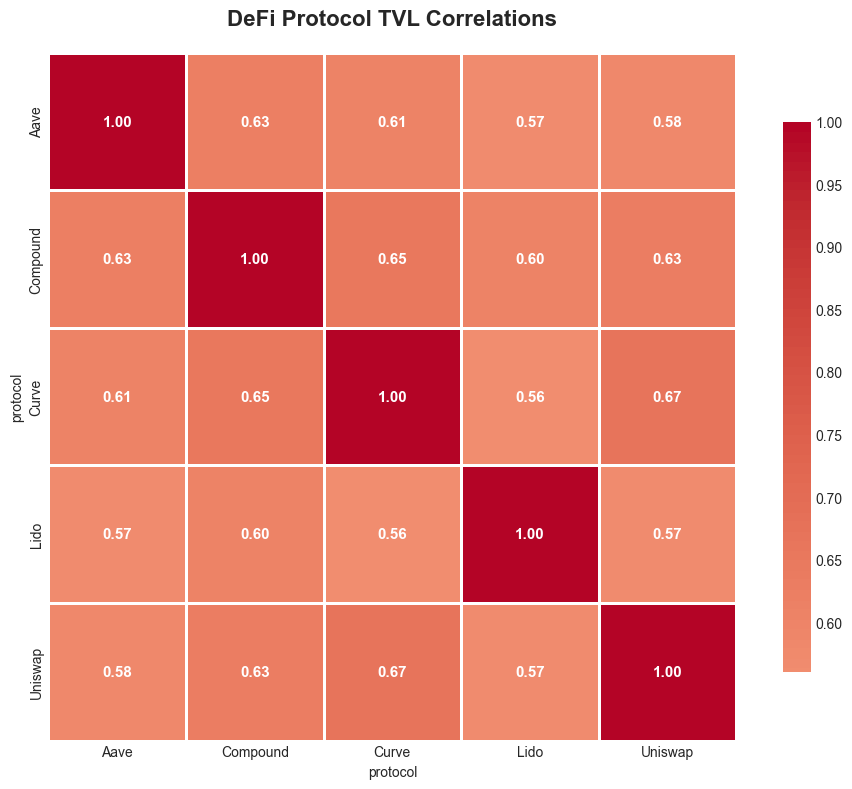


TVL Correlation Matrix:
protocol      Aave  Compound     Curve      Lido   Uniswap
protocol                                                  
Aave      1.000000  0.625480  0.609011  0.568009  0.584380
Compound  0.625480  1.000000  0.650989  0.603645  0.632919
Curve     0.609011  0.650989  1.000000  0.560396  0.666358
Lido      0.568009  0.603645  0.560396  1.000000  0.565567
Uniswap   0.584380  0.632919  0.666358  0.565567  1.000000


In [11]:
# Calculate correlations between protocols
tvl_pivot = historical_df.pivot(index='date', columns='protocol', values='tvl_millions')
correlation_matrix = tvl_pivot.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
           square=True, linewidths=2, cbar_kws={"shrink": 0.8},
           fmt='.2f', annot_kws={'fontsize': 11, 'fontweight': 'bold'})
plt.title('DeFi Protocol TVL Correlations', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('../visualizations/static/defi_correlations.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nTVL Correlation Matrix:")
print(correlation_matrix)

In [12]:
# Save processed data
historical_df.to_csv('../data/processed/defi_historical_processed.csv', index=False)
growth_df.to_csv('../data/processed/defi_growth_rates.csv', index=False)
correlation_matrix.to_csv('../data/processed/defi_correlations.csv')
print("Processed data saved!")

Processed data saved!


## Key Findings (To be updated after running analysis)

1. **TVL Leader**: [To be filled]
2. **Fastest Growing Protocol**: [To be filled]
3. **Market Concentration**: [To be filled]
4. **Protocol Correlations**: [To be filled]

## Next Steps
- Create interactive dashboard with protocol comparison
- Analyze TVL vs token price correlation
- Track protocol dominance over time